<a href="https://colab.research.google.com/github/Mithula-cbw/jupyter-notebooks-public/blob/main/DA-tutorial-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.shape

(1000, 16)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
df['gender'] = df['gender'].astype('category')
df['part_time_job'] = df['part_time_job'].astype('category')
df['diet_quality'] = df['diet_quality'].astype('category')
df['parental_education_level'] = df['parental_education_level'].astype('category')
df['internet_quality'] = df['internet_quality'].astype('category')
df['extracurricular_participation'] = df['extracurricular_participation'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     1000 non-null   object  
 1   age                            1000 non-null   int64   
 2   gender                         1000 non-null   category
 3   study_hours_per_day            1000 non-null   float64 
 4   social_media_hours             1000 non-null   float64 
 5   netflix_hours                  1000 non-null   float64 
 6   part_time_job                  1000 non-null   category
 7   attendance_percentage          1000 non-null   float64 
 8   sleep_hours                    1000 non-null   float64 
 9   diet_quality                   1000 non-null   category
 10  exercise_frequency             1000 non-null   int64   
 11  parental_education_level       909 non-null    category
 12  internet_quality               1000

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
numerical_df.drop(columns=['mental_health_rating'], inplace=True)
numerical_df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,exam_score
0,23,0.0,1.2,1.1,85.0,8.0,6,56.2
1,20,6.9,2.8,2.3,97.3,4.6,6,100.0
2,21,1.4,3.1,1.3,94.8,8.0,1,34.3
3,23,1.0,3.9,1.0,71.0,9.2,4,26.8
4,19,5.0,4.4,0.5,90.9,4.9,3,66.4


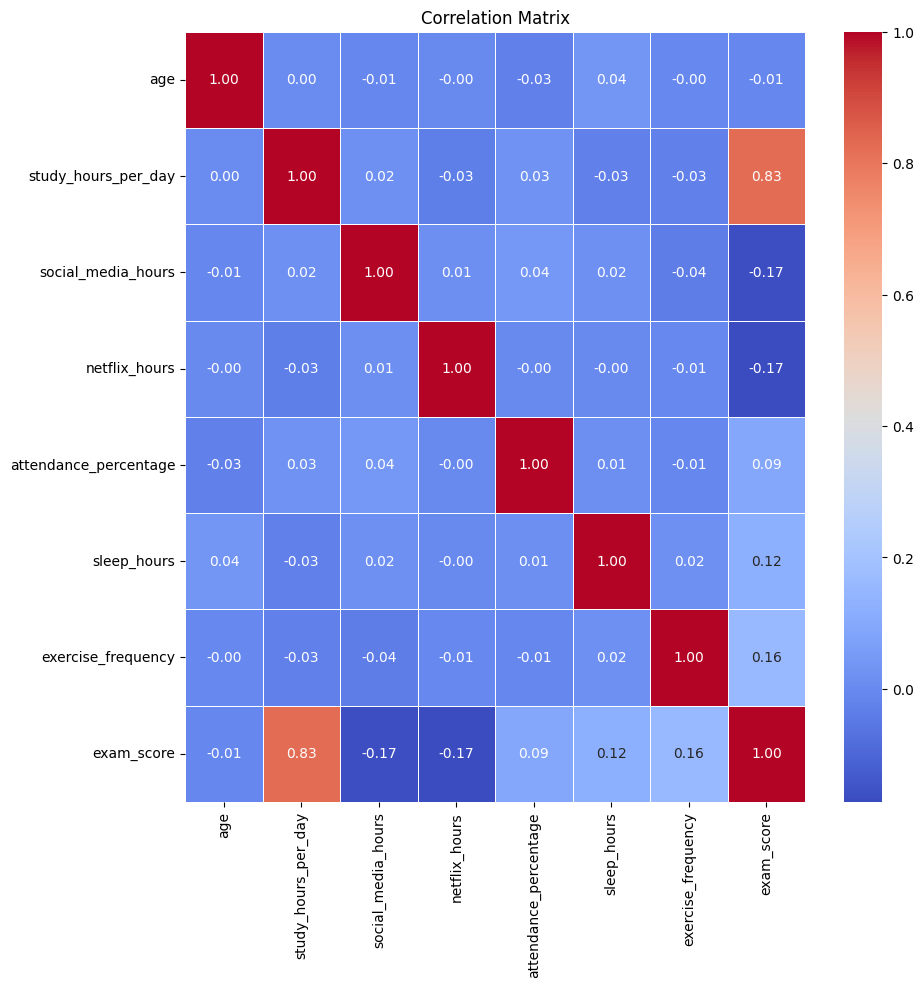

In [ ]:
corr = numerical_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

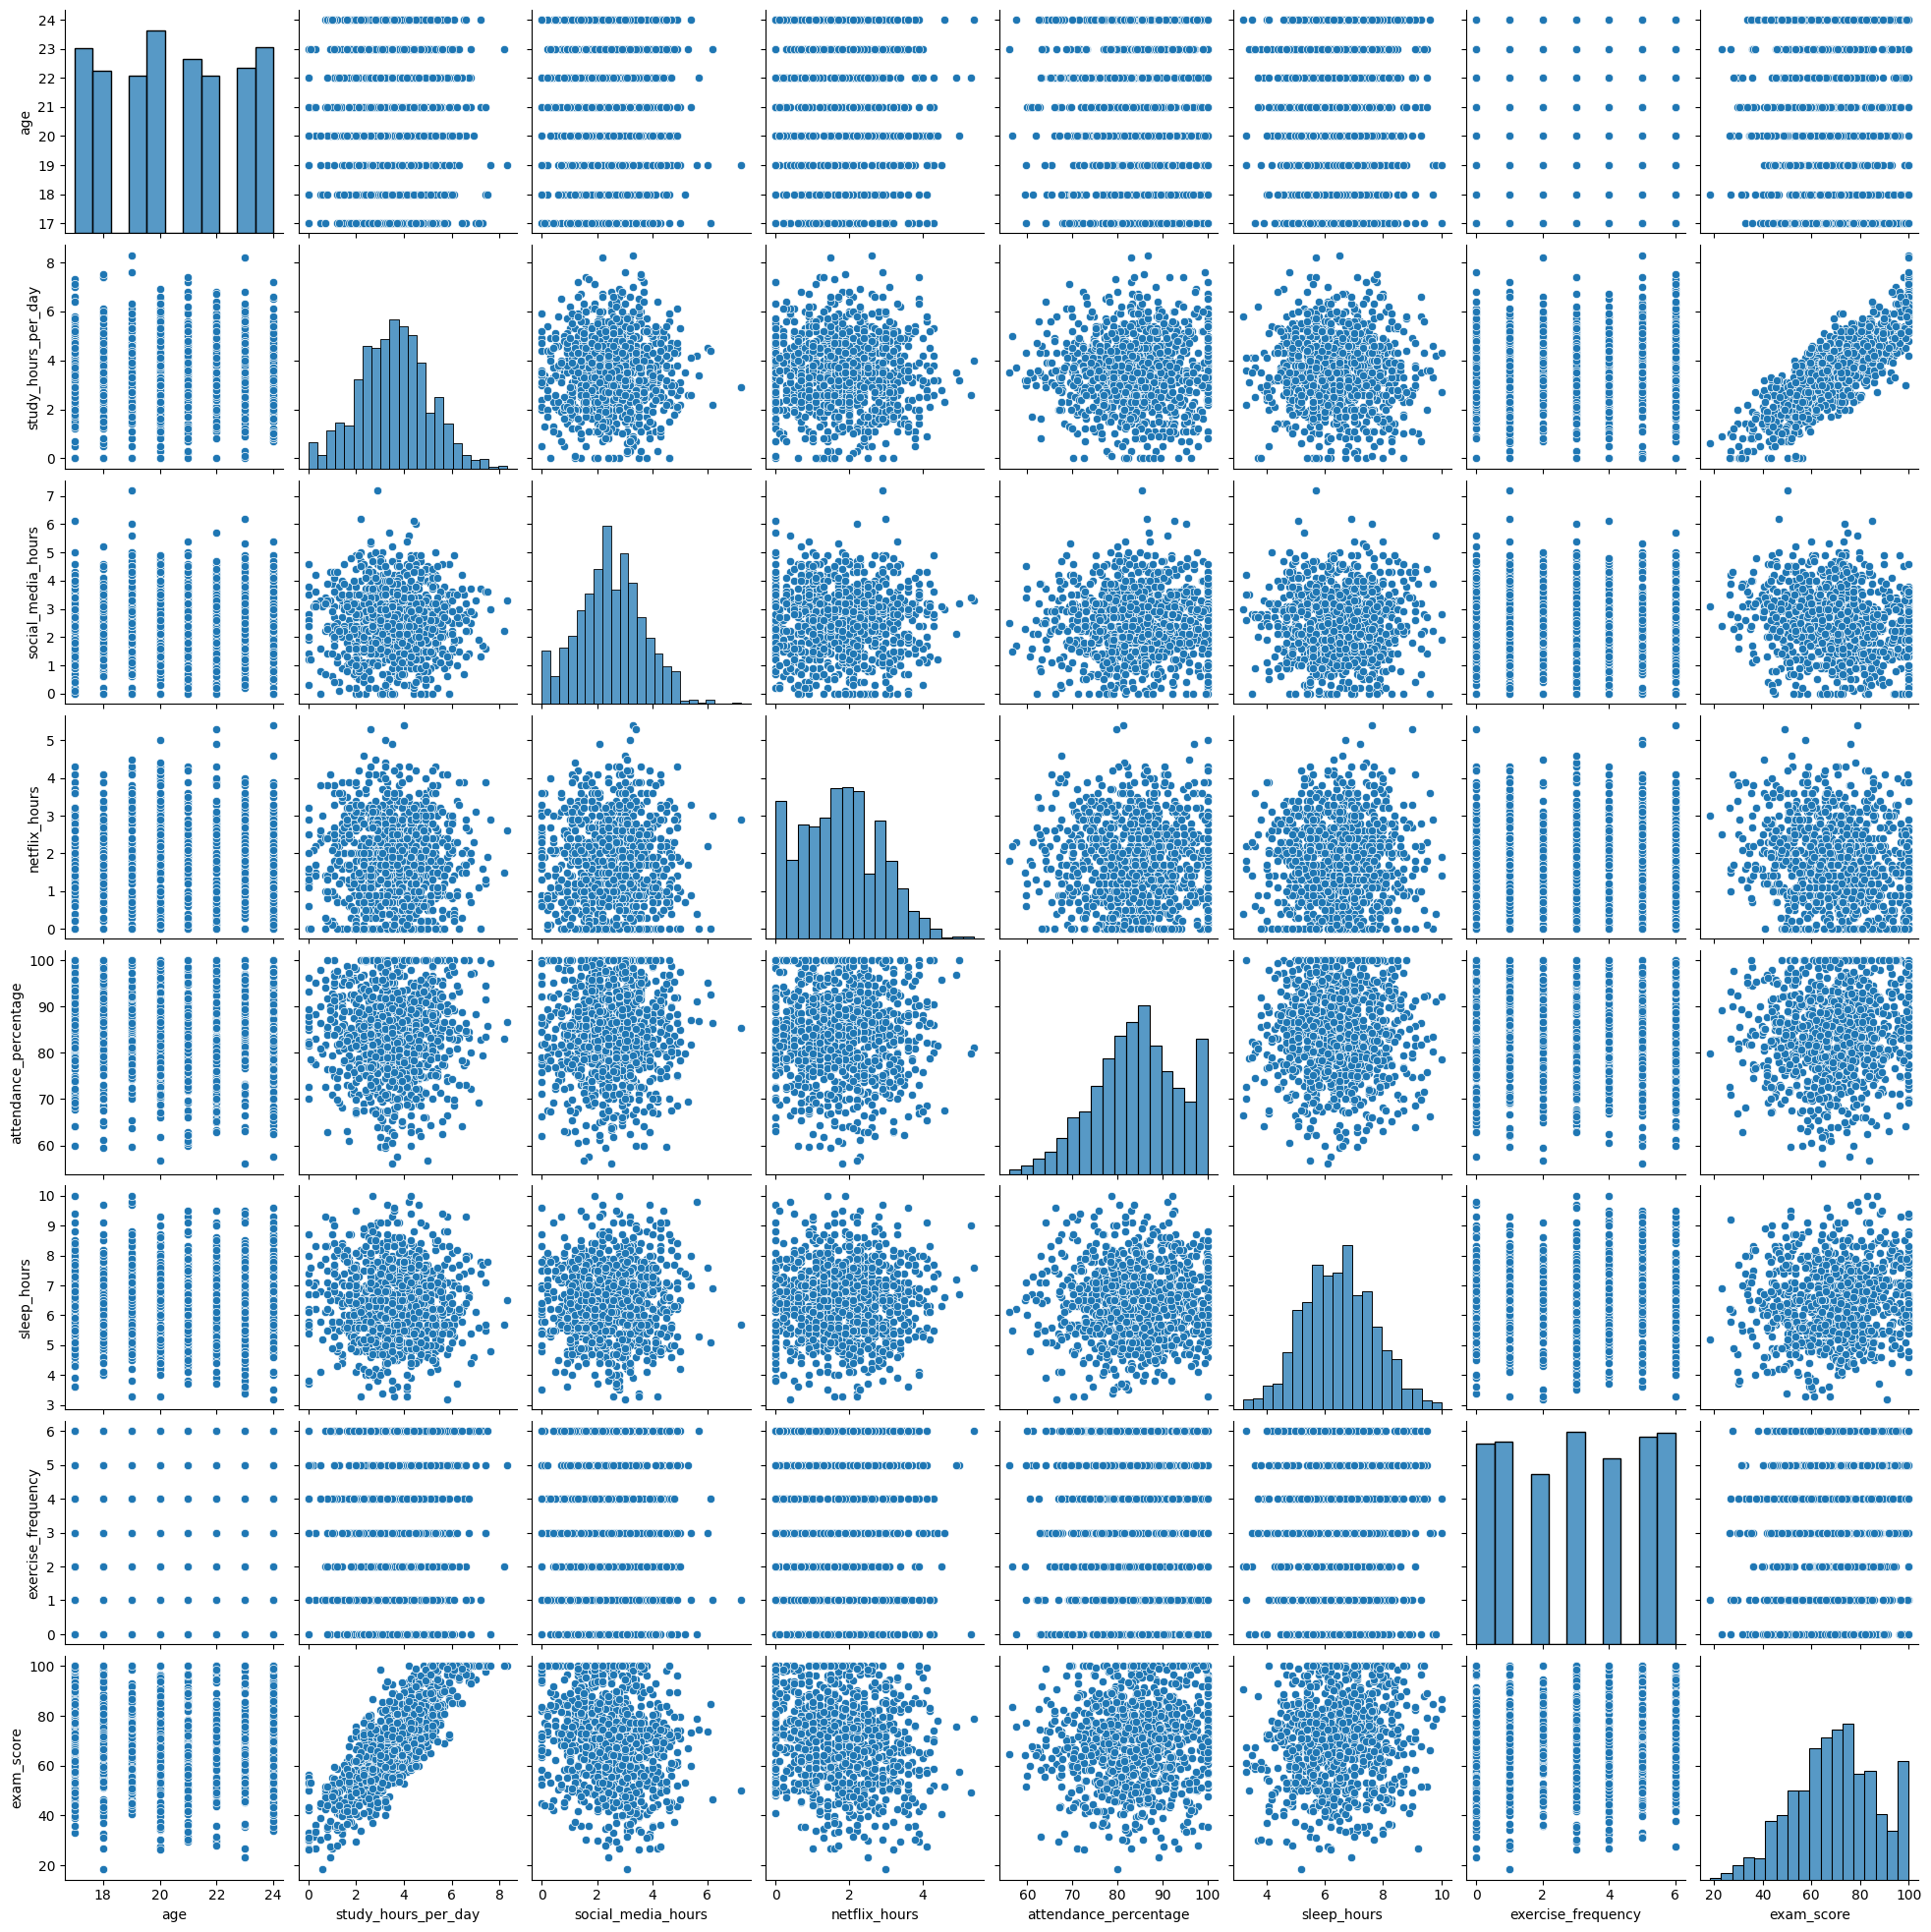

In [ ]:
sns.pairplot(numerical_df)
plt.show()

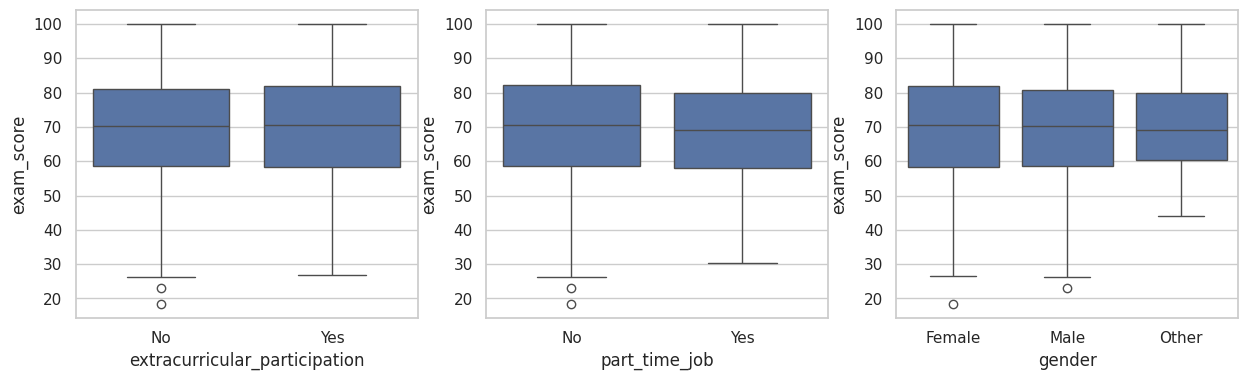

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='extracurricular_participation', y='exam_score' ,data=df)

plt.subplot(1, 3, 2)
sns.boxplot(x='part_time_job', y='exam_score', data=df)

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='exam_score', data=df)

plt.show()

In [ ]:
df['gender'].value_counts()

,count
gender,
Female,481
Male,477
Other,42


In [ ]:
from scipy.stats import chi2_contingency

cat_pairs = [
    ('gender', 'part_time_job'),
    ('part_time_job', 'extracurricular_participation'),
    ('gender', 'extracurricular_participation')
]

for var1, var2 in cat_pairs:
  table = pd.crosstab(df[var1], df[var2])
  chi2, p, dof, expected = chi2_contingency(table)

  print(f"Chi-squared test for {var1} and {var2}:")
  print(f"Chi-squared statistic: {chi2:.2f}")
  print(f"P-value: {p:.4f}")

  if p < 0.05:
    print("There is a significant association between the variables.")
  else:
    print("There is no significant association between the variables.")

  print()

Chi-squared test for gender and part_time_job:
Chi-squared statistic: 1.33
P-value: 0.5153
There is no significant association between the variables.

Chi-squared test for part_time_job and extracurricular_participation:
Chi-squared statistic: 0.41
P-value: 0.5224
There is no significant association between the variables.

Chi-squared test for gender and extracurricular_participation:
Chi-squared statistic: 0.08
P-value: 0.9591
There is no significant association between the variables.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
categorical = ['gender', 'part_time_job', 'extracurricular_participation']
numerical = ['exercise_frequency', 'sleep_hours', 'study_hours_per_day']
x = df[categorical + numerical]
y = df['exam_score']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
    ], remainder='passthrough')

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

Pipeline.fit(model, x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'part_time_job',
                                                   'extracurricular_participation'])])),
                ('regressor', LinearRegression())])

In [ ]:
for col in categorical:
    print(f"{col}: {df[col].cat.categories}")

gender: Index(['Female', 'Male', 'Other'], dtype='object')
part_time_job: Index(['No', 'Yes'], dtype='object')
extracurricular_participation: Index(['No', 'Yes'], dtype='object')


In [ ]:
# Get OneHotEncoder step inside ColumnTransformer
ohe = pipeline.named_steps['preprocessing'].named_transformers_['cat']
# Get feature names generated by OneHotEncoder
encoded_feature_names =ohe.get_feature_names_out (categorical).tolist()
# Final full list of features (encoded categorical + numerical) full_feature_names = encoded_feature_names + numerical
coefficients = pipeline.named_steps ['model'].coef_ intercept pipeline.named_steps [ 'model'].intercept_
# Create the coefficient table
coef_table = pd.DataFrame((
    'Feature': full_feature_names, 'Coefficient': coefficients
print("Intercept: ", intercept)
})


SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' on line 3 (ipython-input-36-3899534066.py, line 4)